In [1]:
import importlib
experiment_1 = importlib.import_module("experiment 1")
importlib.reload(experiment_1)
import importlib
generate_dataset = importlib.import_module("generate_dataset")
importlib.reload(generate_dataset)



import importlib

experiment_2 = importlib.import_module("experiment_2")
importlib.reload(experiment_2)

experiment_4 = importlib.import_module("experiment_4")
importlib.reload(experiment_4)

<module 'experiment_4' from 'f:\\Jelena\\FAKULTET\\Student\\DOKTORAT\\projekat 2rad\\oop\\experiment_4.py'>

In [2]:
from generate_dataset import *
from neural_net import *
from plotting import *
from postprocessing_dataset import *
from predicting import *
from preprocessing_dataset import *
from testing import *
import json
np.set_printoptions(precision=2)

In [ ]:
data = generate_dataset.generate_raw_dataset_K(5000,600)

In [ ]:
len(data["objects"])

In [ ]:
experiment_4.export_dataset(data,"data_K.json")

In [ ]:
data =  experiment_4.import_dataset("data_K.json")

In [ ]:
data

In [3]:
def experiment_J_K(data_train,data_test, train_set_sizes,testset_size,object_types_prediction,max_obj_types,feature = 1):
    length_feature = 1
    whole = 5
    
    length_feature = 1
    num_features = 1
    def reset_weights(model):
        import keras.backend as K
        session = K.get_session()
        for layer in model.layers: 
            if hasattr(layer, 'kernel_initializer'): 
                layer.kernel.initializer.run(session=session)
            if hasattr(layer, 'bias_initializer'):
                layer.bias.initializer.run(session=session)  
    precissions_types_train, recall_types_train,precissions_types_test, recall_types_test = [],[],[],[]
    #object_types_prediction  = list(range(0,data_train["objects"].shape[1]))
    train_raw_dataset = experiment_4.make_train(data_train, train_set_sizes[0])
    print(object_types_prediction)
    X_test,Y_test = experiment_1.data_preprocessing(data_test,max_obj_types,length_feature,object_types_prediction,feature)
    print(X_test.shape)
#     X_test = X_test[:,[0,1,4],:]
    Xtrains = []
    Ytrains = []
    Xtest = []
    Ytest = []
    preds_train = []
    preds_test = []
    
    types_train = []
    types_test = []
    for train_size_id in range(len(train_set_sizes)):
        if train_size_id > 0:        
            train_raw_dataset = experiment_4.make_train(data_train, train_set_sizes[train_size_id])
            reset_weights(model)

        X_train,Y_train = experiment_1.data_preprocessing(train_raw_dataset,max_obj_types,length_feature,object_types_prediction,feature)
        print("shape")
        print(X_train.shape)
#         X_train = X_train[:,[0,1,4],:] 
        model = run_nn((X_train, Y_train), (X_test, Y_test),5 )
        pred_train = experiment_1.model_predict(model, X_train,length_feature,2,1)
        pred_test = experiment_1.model_predict(model, X_test,length_feature,2,1)
        
        pred_train = experiment_1.arrange_object(pred_train, Y_train)
        pred_test = experiment_1.arrange_object(pred_test, Y_test)

        
        precision_train_types, recall_train_types = precisions_recalls_types_ex(pred_train,Y_train,object_types_prediction)
        precision_test_types, recall_test_types = precisions_recalls_types_ex(pred_test,Y_test,object_types_prediction)
        precissions_types_train.append(precision_train_types)
        recall_types_train.append(recall_train_types)
        precissions_types_test.append(precision_test_types)
        recall_types_test.append(recall_test_types)
        Xtrains.append(X_train)
        Ytrains.append(Y_train)
        Xtest.append(X_test)
        Ytest.append(Y_test)
        preds_train.append(pred_train)
        preds_test.append(pred_test)
        types_train.append(train_raw_dataset["types"])


    return types_train,precissions_types_train,recall_types_train,precissions_types_test,recall_types_test,Xtrains,Ytrains,Xtest,Ytest,preds_test,preds_train


In [ ]:
max_object_types = 2
object_types_prediction  = list(range(0,max_object_types))
object_types_prediction = object_types_prediction[1:]
data = experiment_4.import_dataset("data_K.json")

precissions_types_train_iterations = []# broj iteracija, broj razlicitih velicina trening skupa, broj tipova,broj primera
recall_types_train_iterations = []
precissions_types_test_iterations = []
recall_types_test_iterations = []

X_types_train_iterations = []# broj iteracija, broj razlicitih velicina trening skupa, broj tipova,broj primera
Y_train_iterations = []
X_types_test_iterations = []
Y_types_test_iterations = []
isti = []
preds_train = []
preds_test = []
types_tran = []
types_test = []
for i in range(0,5):
    #data = import_dataset("data.json")
    data_train,data_test = experiment_4.make_train_test(data, 4000, 1000)

    
    types_tr,precissions_types_train,recall_types_train,precissions_types_test,recall_types_test,a,b,c,d,pred_test,pred_train = experiment_J_K(data_train,data_test, [100, 200, 500, 1000, 4000],1000,object_types_prediction,max_object_types)
    precissions_types_train_iterations.append(precissions_types_train)
    recall_types_train_iterations.append(recall_types_train)
    precissions_types_test_iterations.append(precissions_types_test)
    recall_types_test_iterations.append(recall_types_test)
    X_types_train_iterations.append(a)
    Y_train_iterations.append(b)
    X_types_test_iterations.append(c)
    Y_types_test_iterations.append(d)
    preds_train.append(pred_train)
    preds_test.append(pred_test)
    types_tran.append(types_tr)
    types_test.append(data_test["types"])
    print("finish")
X_types_test_iterations = np.asarray(X_types_test_iterations)
Y_types_test_iterations = np.asarray(Y_types_test_iterations)

recall_types_test_iterations = np.asarray(recall_types_test_iterations)


In [ ]:
X_types_test_iterations = np.asarray(X_types_test_iterations)
Y_types_test_iterations = np.asarray(Y_types_test_iterations)

precissions_types_train_iterations = np.asarray(precissions_types_train_iterations)
precissions_types_test_iterations = np.asarray(precissions_types_test_iterations)

recall_types_train_iterations = np.asarray(recall_types_train_iterations)
recall_types_test_iterations = np.asarray(recall_types_test_iterations)

preds_train,preds_test = np.asarray(preds_train),np.asarray(preds_test)

types_tran = np.asarray(types_tran)
types_test = np.asarray(types_test)

types_test = np.asarray([types_test,types_test,types_test,types_test,types_test])
types_test = np.transpose(types_test,[1,0,2])

In [ ]:
# results = [types_tran,types_test,precissions_types_train_iterations,recall_types_train_iterations,precissions_types_test_iterations,recall_types_test_iterations,X_types_train_iterations,Y_train_iterations,X_types_test_iterations,Y_types_test_iterations,preds_train,preds_test]
# import pickle
# with open("results_k1", "wb") as fp:   #Pickling
#     pickle.dump(results, fp)

In [3]:
import pickle
file = open('results_k1', 'rb')

# dump information to that file
data = pickle.load(file)
types_tran,types_test,precissions_types_train_iterations,recall_types_train_iterations,precissions_types_test_iterations,recall_types_test_iterations,X_types_train_iterations,Y_train_iterations,X_types_test_iterations,Y_types_test_iterations,preds_train,preds_test = data

test_type_0 = (types_test==0)
test_type_1 = (types_test==1)
test_type_2 = (types_test==2)

In [4]:
import pickle
file = open('results_j', 'rb')

# dump information to that file
data = pickle.load(file)
types_tran,types_test,precissions_types_train_iterations,recall_types_train_iterations,precissions_types_test_iterations,recall_types_test_iterations,X_types_train_iterations,Y_train_iterations,X_types_test_iterations,Y_types_test_iterations,preds_train,preds_test = data

test_type_0 = (types_test==0)
test_type_1 = (types_test==1)


In [ ]:
a = np.transpose(types_test1,[1,0,2])

In [ ]:
np.where(types_test[0,4,:] == 0)

In [ ]:
np.where(X_types_test_iterations[0,4,15,0]==1)

In [ ]:
np.where(X_types_test_iterations[0,4,15,2]==1)

In [ ]:
np.where(X_types_test_iterations[0,4,15,1])

In [ ]:
np.where(preds_test[0][4][15])

In [ ]:
np.where(Y_types_test_iterations[0,4,15,:])

In [ ]:
correct_side[3,4,15]

### f1

In [5]:
f1 = experiment_1.f1_obj(precissions_types_test_iterations,recall_types_test_iterations)
f1 = f1[:,:,0,:]

f:\Jelena\FAKULTET\Student\DOKTORAT\projekat 2rad\oop\experiment 1.py:292: RuntimeWarning: invalid value encountered in divide
  return np.nan_to_num(2*prec*rec/(prec+rec))


In [ ]:
experiment_1.plot_f1_by_size(precissions_types_train_iterations,recall_types_train_iterations,'r')
experiment_1.plot_f1_by_size(precissions_types_test_iterations,recall_types_test_iterations,'b')
plt.legend(["train","test"])
plt.savefig("train_test_size")

In [6]:
# f1 po tipovima ex1 (J)
np.ma.masked_where(types_test==0,f1).mean(axis =2).mean(axis = 0).data*100


array([50.29, 53.74, 65.95, 77.92, 87.29])

In [10]:
np.ma.masked_where(types_test==0,f1).mean(axis =0).mean(axis = 1).data*100

array([50.27, 53.74, 66.03, 77.79, 87.45])

In [ ]:
np.ma.masked_where(types_test==1,f1).mean(axis =2).mean(axis = 0).data * 100

### f1 po tipovima ex2(K)

In [ ]:
f1[types_test==0].mean()

In [ ]:
np.ma.masked_where(np.logical_or(types_test==1,types_test==2),f1).mean(axis =2).mean(axis = 0).data*100


In [ ]:
np.ma.masked_where(~(types_test==0),f1).mean(axis =2).mean(axis = 0).data*100


In [ ]:
np.ma.masked_where(np.logical_or(types_test==0,types_test==2),f1).mean(axis =2).mean(axis = 0).data*100


In [ ]:
np.ma.masked_where(np.logical_or(types_test==0,types_test==1),f1).mean(axis =2).mean(axis = 0).data*100


### Distance

In [5]:
###distanec

def distance_o_f(pred,X_test):
    distance = []
    
    for i in range(pred.shape[0]):
        if (pred[i].sum() != 0) :
            start = np.where(pred[i]==1)[0][0]
            end = np.where(pred[i]==1)[0][-1]
            feature = np.where(X_test[i][1]==1)[0][0]
        #         print(end,length)

            if feature > end:
                dist = feature - end
            elif feature < start:
                dist = start - feature
            else:
                dist = -min(end - feature, feature - start)
            distance.append(dist)
        else:
            distance.append(0)
    return distance
# def violation_iteration_size(pred,X_test):
#     violations = []
#     for i in range(pred.shape[0]):#iteration
#         violations.append([violation(pred[i][j],X_test[i][j]) for j in range(0,pred.shape[1])])#size
#     return np.asarray(violations)

def distance_o_f_iteration(pred,X_test):
    distance_iter = []
    for i in range(pred.shape[0]):#iteration
        distance = []
        for j in range(0,pred.shape[1]):
            dist = distance_o_f(pred[i][j],X_test[i][j])
#            nepreskace = niz == 0
            distance.append(dist)

#        violations_all_count.append(violations_count)
        distance_iter.append(distance)

        #        cor_all.append(corrects)
    return np.asarray(distance_iter)

In [6]:
dist = distance_o_f_iteration(preds_test,X_types_test_iterations)

In [ ]:
dist

### exp 1(J)

In [ ]:
#cover total
(dist<=0).mean(axis =2).mean(axis = 0)*100

In [28]:
#dist total
np.ma.masked_where(dist<=0,dist).mean(axis =2).mean(axis = 0).data

array([56.66, 36.96, 18.68,  9.46,  4.51])

In [29]:
types_test

array([[[1, 1, 0, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0]],

       [[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[1, 1, 0, ..., 0, 0, 1],
        [1, 1, 0, ..., 0, 0, 1],
        [1, 1, 0, ..., 0, 0, 1],
        [1, 1, 0, ..., 0, 0, 1],
        [1, 1, 0, ..., 0, 0, 1]],

       [[1, 0, 0, ..., 1, 1, 1],
        [1, 0, 0, ..., 1, 1, 1],
        [1, 0, 0, ..., 1, 1, 1],
        [1, 0, 0, ..., 1, 1, 1],
        [1, 0, 0, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 1, 0, 0]]])

(-3.0, 100.0)

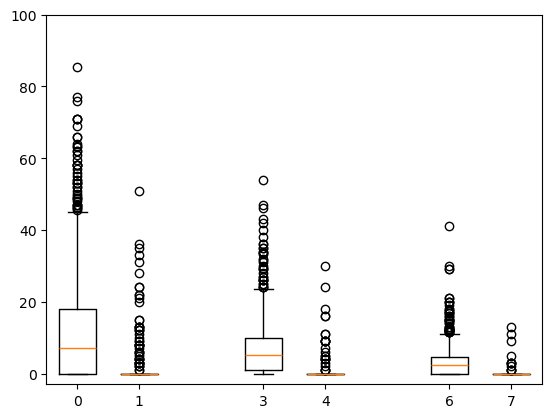

In [38]:
import matplotlib.pyplot as plt
l8a = np.ma.masked_where(np.logical_or(~(types_test==0),dist<=0),dist)[:,4,:].mean(axis = 0)

l8b = np.ma.masked_where(np.logical_or(~(types_test==1),dist<=0),dist)[:,4,:].mean(axis = 0)


idx = 0
for i in range(2,5):
    l8a = np.ma.masked_where(np.logical_or(~(types_test==0),dist<=0),dist)[:,i,:].mean(axis = 0)

    l8b = np.ma.masked_where(np.logical_or(~(types_test==1),dist<=0),dist)[:,i,:].mean(axis = 0)

    plt.boxplot([l8a,l8b], positions=[idx,idx+1], widths = 0.6)
    idx = idx + 3

plt.ylim(-3,100)

In [ ]:
import pickle


# dump information to that file
file = open('results_f', 'rb')

# dump information to that file
data = pickle.load(file)



precissions_types_train_iterations,recall_types_train_iterations,precissions_types_test_iterations,recall_types_test_iterations,X_types_train_iterations,Y_train_iterations,X_types_test_iterations,Y_types_test_iterations,preds_train,preds_test = data

over6,dist6 = experiment_2.overl_dist_iterations(preds_test, X_types_test_iterations)#dist -1 tamo gde je overlaping>0 i obrnuto

left_test,right_test = experiment_2.to_the_left_to_o1(X_types_test_iterations[:,:,:,1,:],Y_types_test_iterations)
left_pred,right_pred = experiment_2.to_the_left_to_o1(X_types_test_iterations[:,:,:,1,:],preds_test)
l6 =np.ma.masked_where(np.logical_or(right_pred,dist6<=0),dist6).mean(axis = 0)


file = open('results_g', 'rb')

# dump information to that file
data = pickle.load(file)

precissions_types_train_iterations,recall_types_train_iterations,precissions_types_test_iterations,recall_types_test_iterations,X_types_train_iterations,Y_train_iterations,X_types_test_iterations,Y_types_test_iterations,preds_train,preds_test = data

over7,dist7 = experiment_2.overl_dist_iterations(preds_test, X_types_test_iterations)#dist -1 tamo gde je overlaping>0 i obrnuto

l7 = np.ma.masked_where(dist7<=0,dist7).mean(axis = 0).data

# for i in range(5):
#     plt.boxplot(l9a[i], positions=[i + 1.1], labels=['X{}'.format(i + 1)])
num_groups = 5
idx = 1
# Width of each box
box_width = 0.35
for i in range(2,5):

    plt.boxplot([l6[i],l7[i]], positions=[idx,idx+1], widths = 0.6)
    idx = idx + 3




plt.savefig("F:/Jelena/FAKULTET/Student/DOKTORAT/radovi/nase/2. rad/applied ai/tabels/imgs/data_e_giss_box.png")



plt.show()
np.savetxt('l6.txt', l6, fmt='%.2f')
np.savetxt('l7.txt', l7, fmt='%.2f')

In [26]:
l8a

masked_array(data=[--, --, --, --, --, --, --, 0.0, --, --, 0.0, --, --,
                   --, --, --, --, 0.0, --, --, --, 0.0, 0.0, 0.0, --, --,
                   --, --, --, --, --, --, --, 0.0, --, --, --, 0.0, --,
                   --, 0.0, --, --, --, 0.0, --, --, 0.0, 0.0, 0.0, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   0.0, 0.0, 0.0, --, --, --, --, 0.0, --, --, --, --, --,
                   --, --, --, --, --, --, --, 0.0, --, --, --, 0.0, 0.0,
                   --, 0.0, 0.0, --, --, --, 0.0, --, --, --, --, --, 0.0,
                   --, --, --, --, --, --, --, 0.0, --, --, 0.0, --, --,
                   0.0, 0.0, --, --, --, --, --, --, --, --, --, --, --,
                   --, 0.0, --, --, --, 0.0, 0.0, --, 0.0, --, --, --, --,
                   0.0, --, --, --, 0.0, --, --, 0.0, --, --, --, 0.0, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   0.0, --, 0.0, --, 

In [9]:
#inter dsictance
-1 * np.ma.masked_where(np.logical_or(types_test==1,dist>0),dist).mean(axis =2).mean(axis = 0).data

array([28.25, 25.56, 15.15,  8.78,  3.6 ])

In [ ]:
np.ma.masked_where(dist<=0,dist).mean(axis =2).mean(axis = 0).data

In [ ]:
#cover 1
np.ma.masked_where(types_test1==0,(dist<=0)).mean(axis =2).mean(axis = 0).data*100

In [ ]:
#cover 0
np.ma.masked_where(types_test1==1,(dist<=0)).mean(axis =2).mean(axis = 0).data*100

In [ ]:
import numpy as np
#dist 0
np.ma.masked_where(np.logical_or(types_test==1,(dist<=0)),dist).mean(axis =2).mean(axis = 0).data


NameError: name 'np' is not defined

In [ ]:
#dist 1
np.ma.masked_where(np.logical_or(types_test==0,(dist<=0)),dist).mean(axis =2).mean(axis = 0).data
np.ma.masked_where(np.logical_or(types_test==1,(dist<=0)),dist).mean(axis =2).std(axis = 0).data

In [ ]:
plt.hist(dist[0,0])

In [ ]:
dist[0,0][17]

In [ ]:
preds_test[0,0,17]

In [ ]:
Y_types_test_iterations[0,0,17]

In [ ]:
X_types_test_iterations[0,0,17][1]

In [ ]:
X_types_test_iterations[0,0,5][0]

In [ ]:
np.ma.masked_where(dist<=0,dist).mean(axis =2).mean(axis = 0).data
np.ma.masked_where(np.logical_or(~test_type_0,(dist<=0)),dist).mean(axis =2).mean(axis = 0).data

### exp 2(K)

In [5]:
test_type_0 = (types_test==0)
test_type_1 = (types_test==1)
test_type_2 = (types_test==2)

In [ ]:
#cover total
(dist<=0).mean(axis =2).mean(axis = 0)*100

In [ ]:
#dist total
np.ma.masked_where(dist<=0,dist).mean(axis =2).mean(axis = 0).data
np.ma.masked_where(np.logical_or(~test_type_0,(dist<=0)),dist).mean(axis =2).mean(axis = 0).data
np.ma.masked_where(np.logical_or(~test_type_0,(dist<=0)),dist).std(axis =2).mean(axis = 0).data

In [10]:
#cover 0
np.ma.masked_where(np.logical_or(test_type_1,test_type_2),(dist<=0)).mean(axis =2).mean(axis = 0).data*100

array([23.97, 20.87, 10.89,  6.06,  2.96])

In [ ]:
#dist 0
np.ma.masked_where(np.logical_or(~test_type_0,(dist<=0)),dist).mean(axis =2).mean(axis = 0).data

In [9]:
#cover 1
np.ma.masked_where(np.logical_or(test_type_0,test_type_2),(dist<=0)).mean(axis =2).mean(axis = 0).data*100

array([19.29, 18.99,  8.4 ,  5.99,  4.39])

In [ ]:
#dist 1
np.ma.masked_where(np.logical_or(~test_type_1,(dist<=0)),dist).mean(axis =2).mean(axis = 0).data

In [ ]:
#cover 2
np.ma.masked_where(np.logical_or(test_type_0,test_type_1),(dist<=0)).mean(axis =2).mean(axis = 0).data*100

In [ ]:
#dist 2
np.ma.masked_where(np.logical_or(~test_type_2,(dist<=0)),dist).mean(axis =2).mean(axis = 0).data

In [25]:
#inter distance dist 2
-1 * np.ma.masked_where(np.logical_or(types_test==2,dist>0),dist).mean(axis =2).mean(axis = 0).data

array([23.68, 23.98, 23.35, 14.89, 11.99])

In [ ]:
types_test1 = np.asarray([types_test,types_test,types_test,types_test,types_test])

In [ ]:
X_types_test_iterations.shape

In [ ]:
test_type_0[0,0,0]

In [ ]:
np.where(X_types_test_iterations[0,0,0,0]==1)

In [ ]:
np.where(X_types_test_iterations[0,0,0,1]==1)

In [ ]:
test_type_0.shape

In [ ]:
X_types_test_iterations.shape

### Correct side

In [38]:
left_pred,right_pred = experiment_2.to_the_left_to_o1(X_types_test_iterations[:,:,:,2,:],preds_test)

In [5]:
left_test,right_test = experiment_2.to_the_left_to_o1(X_types_test_iterations[:,:,:,2,:],Y_types_test_iterations)

In [45]:
np.ma.masked_where(np.logical_or(~test_type_0,(dist<=0)),(right_predf == right_pred)).mean(axis =2).mean(axis = 0).data*100

array([ 97.85,  99.24,  99.69,  99.93, 100.  ])

### Correct side feaature 

In [43]:
left_predf,right_predf = experiment_2.to_the_left_to_o1(X_types_test_iterations[:,:,:,1,:],preds_test)
left_test,right_test = experiment_2.to_the_left_to_o1(X_types_test_iterations[:,:,:,1,:],Y_types_test_iterations)

In [19]:
correct_side = (left_pred==left_test)
correct_side.mean(axis = 0).mean(axis = 1)*100

array([71.34, 69.72, 79.16, 84.86, 87.84])

In [29]:
np.ma.masked_where(np.logical_or(~test_type_0,(dist<=0)),correct_side).mean(axis =2).mean(axis = 0).data*100

array([70.61, 68.88, 81.41, 85.8 , 88.16])

In [24]:
np.ma.masked_where(np.logical_or(~test_type_1,(dist<=0)),correct_side).mean(axis =2).mean(axis = 0).data*100

array([92.34, 94.01, 96.77, 97.06, 97.66])

In [21]:
np.ma.masked_where(np.logical_or(~test_type_2,(dist<=0)),correct_side).mean(axis =2).mean(axis = 0).data*100

array([69.22, 73.64, 83.8 , 87.3 , 92.9 ])

In [ ]:
(np.logical_or(types_test==2,dist>0),dist)

In [8]:
np.ma.masked_where(~(types_test==2),correct_side).mean(axis = 0).mean(axis = 1).data*100
correct_side.mean(axis = 0).mean(axis = 1)*100

array([77.3 , 78.9 , 86.2 , 90.34, 94.54])

In [ ]:
correct_side[types_test==0].mean()

In [31]:
np.ma.masked_where(~test_type_0,correct_side).mean(axis = 2).mean(axis = 0).data*100

array([35.84, 41.36, 63.3 , 78.58, 88.84])

In [34]:
np.ma.masked_where(~test_type_2,correct_side).mean(axis = 2).mean(axis = 0).data*100

array([97.84, 97.14, 97.5 , 96.4 , 97.64])

In [ ]:
np.ma.masked_where(~test_type_2,correct_side).mean(axis = 2).mean(axis = 0).data*100

In [ ]:
correct_side.mean(axis = 2).mean(axis = 0)*100

### Overlapping

In [6]:
overl,dist_o = experiment_4.overl_dist_iterations(preds_test, X_types_test_iterations)#dist -1 tamo gde je overlaping>0 i obrnuto

In [7]:
np.ma.masked_where(np.logical_or(~(types_test==0),~correct_side),dist_o>0).mean(axis = 2).mean(axis = 0).data*100

NameError: name 'correct_side' is not defined

In [47]:
np.ma.masked_where(np.logical_or(~(types_test==0),~correct_side),dist_o).mean(axis = 2).mean(axis = 0).data

array([13.28, 15.99, 14.86,  8.97,  4.13])

In [8]:
np.ma.masked_where(~ (types_test==2),dist_o>0).mean(axis = 2).mean(axis = 0).data*100

array([69.31, 77.32, 87.69, 92.04, 95.89])

In [10]:
np.ma.masked_where(~ (types_test==2),dist_o).mean(axis = 2).mean(axis = 0).data

array([41.07, 41.24, 56.42, 67.19, 72.59])

In [ ]:
np.ma.masked_where(np.logical_or(~(types_test==1),~correct_side),overl==0).mean(axis = 2).mean(axis = 0).data*100

In [17]:
np.ma.masked_where(np.logical_or(~(types_test==2),~correct_side),overl>0).mean(axis = 2).mean(axis = 0).data*100

array([16.52, 11.59,  3.04,  1.58,  0.59])

In [ ]:
np.ma.masked_where(types_test==2,dist_o==0).mean(axis = 2).mean(axis = 0).data*100

In [ ]:
np.ma.masked_where(np.logical_or(types_test==2,~correct_side),dist>0).mean(axis = 2).mean(axis = 0).data*100

In [ ]:
np.ma.masked_where(np.logical_or(~(types_test==0),~correct_side),dist>0).mean(axis = 2).mean(axis = 0).data*100

In [ ]:
np.ma.masked_where(np.logical_or(~(types_test==0),~correct_side),overl>0).mean(axis = 2).mean(axis = 0).data*100

In [51]:
## Distance area
np.ma.masked_where(np.logical_or(np.logical_or(~(types_test==1),~correct_side),dist_o<=0),dist_o).mean(axis = 2).mean(axis = 0).data

array([63.54, 55.43, 32.64, 27.59, 18.12])

In [50]:
##overlaping area
np.ma.masked_where(np.logical_or(np.logical_or(~(types_test==2),~correct_side),overl<=0),overl).mean(axis = 2).mean(axis = 0).data

array([31.22, 25.89, 18.03, 23.24, 13.12])

{'whiskers': [<matplotlib.lines.Line2D at 0x21c0b54f310>,
 'caps': [<matplotlib.lines.Line2D at 0x21c0b54f850>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c0b54f070>],
 'medians': [<matplotlib.lines.Line2D at 0x21c0b54fd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c0b58c070>],
 'means': []}

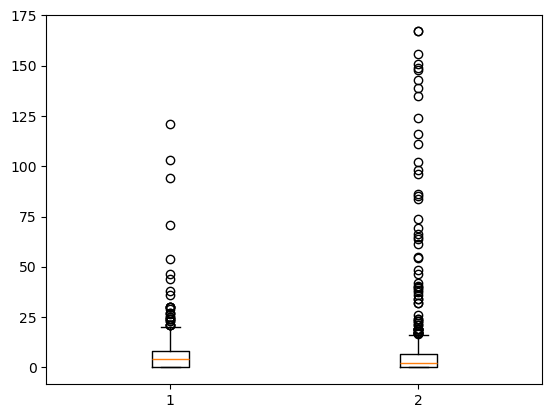

In [125]:
import matplotlib.pyplot as plt
l9a = np.ma.masked_where(np.logical_or(np.logical_or(~(types_test==0),~correct_side),dist_o<=0),dist_o)[:,4,:].mean(axis = 0)

l9b = np.ma.masked_where(np.logical_or(np.logical_or(~(types_test==1),~correct_side),dist_o<=0),dist_o)[:,4,:].mean(axis = 0)

plt.boxplot(l9a,positions =[1])
plt.boxplot(l9b,positions = [2])
#plt.savefig("F:/Jelena/FAKULTET/Student/DOKTORAT/radovi/nase/2. rad/applied ai/tabels/imgs/box_lt9ab.png")


In [157]:


### crta sve sa fg exp


# l6 = np.loadtxt('l6.txt')
# l7 = np.loadtxt('l7.txt')
# l9a = np.ma.masked_where(np.logical_or(np.logical_or(~(types_test==0),~correct_side),dist_o<=0),dist_o)[:,:,:].mean(axis = 0)

# l9b = np.ma.masked_where(np.logical_or(np.logical_or(~(types_test==1),~correct_side),dist_o<=0),dist_o)[:,:,:].mean(axis = 0)

# # for i in range(5):
# #     plt.boxplot(l9a[i], positions=[i + 1.1], labels=['X{}'.format(i + 1)])
# num_groups = 5
# idx = 1
# # Width of each box
# box_width = 0.35
# for i in range(2,5):

#     plt.boxplot([l6[i],l7[i],l9a[i],l9b[i]], positions=[idx +x for x in range(0,4)], widths = 0.4)
#     idx = idx + 5
# plt.savefig("F:/Jelena/FAKULTET/Student/DOKTORAT/radovi/nase/2. rad/applied ai/tabels/imgs/box_lt679_ts500154k.png")
# # plt.xticks([1,2,3,4,5],['100', '200', '500','1000','4000'])

In [139]:
l9b.shape

(5, 1000)

In [128]:
l9a.shape

(5, 1000)

In [158]:
# proveravala sam da li su dobri tr primeri jer mi pbili neobicni rezultati
#ex = 1
# print(np.argwhere(X_types_test_iterations[types_test==1][1][0]==1))
# Y_types_test_iterations[types_test==1][1].sum()

In [85]:
X_types_test_iterations[types_test==1][1]1

(8270, 6, 600)

In [84]:
types_test.shape

(5, 5, 1000)

In [ ]:
np.ma.masked_where(np.logical_or(~types_test==0,~correct_side),dist).mean(axis = 2).mean(axis = 0).data

In [ ]:
((Y_types_test_iterations[:,:,:,0] == 1) | (Y_types_test_iterations[:,:,:,0] != 1)).sum(axis = 2)

In [ ]:
np.ma.masked_where(dist<=0,dist).mean(axis = 2).mean(axis = 0)

In [ ]:
np.ma.masked_where(dist<=0,dist).mean(axis = 2).mean(axis = 0)

## Overlaping kad ga stavlja blize levoj ili desnoj ivici

In [ ]:
np.ma.masked_where(np.logical_or(~left_pred,test_type_2),overl>0).mean(axis = 2).mean(axis = 0).data *100

In [ ]:
np.ma.masked_where(np.logical_or(~right_pred,test_type_2),overl>0).mean(axis = 2).mean(axis = 0).data *100

In [ ]:
np.ma.masked_where(np.logical_or(~right_pred,test_type_2),overl>0).mean(axis = 2).mean(axis = 0).data *100

In [ ]:
np.ma.masked_where(np.logical_or(test_type_2,np.logical_or(~right_pred,overl<=0)),overl).mean(axis = 2).mean(axis = 0).data

In [ ]:
np.where(X_types_test_iterations[0,0,1,0])

## Overlaping kad ga stavlja s leve ili desne strane


In [ ]:
dist.shape

In [ ]:
dist[dist>0]

In [ ]:
 np.where(dist>0)

In [ ]:
np.where(X_types_test_iterations[0,0,60,0]==1)

In [ ]:
np.where(X_types_test_iterations[0,0,60,1]==1)

In [ ]:
np.where(Y_types_test_iterations[0,0,60]==1)

In [ ]:
np.ma.masked_where(dist>0,dist)

In [ ]:
# left_pred_0 = left_pred[test_type_0]
# left_pred_1 = left_pred[test_type_1]
# left_pred_2 = left_pred[test_type_2]

# right_pred_0 = right_pred[test_type_0]
# right_pred_1 = right_pred[test_type_1]
# right_pred_2 = right_pred[test_type_2]


# left_test_0 = left_test[test_type_0]
# left_test_1 = left_test[test_type_1]
# left_test_2 = left_test[test_type_2]

# right_test_0 = right_test[test_type_0]
# right_test_1 = right_test[test_type_1]
# right_test_2 = right_test[test_type_2]
